In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D, AveragePooling2D, Dropout, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import cv2 as cv
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test,10)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train = (x_train)/255
x_test = (x_test)/255

In [6]:
model=Sequential()
model.add(Conv2D(filters=6, kernel_size=5,padding='same', activation='tanh', input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=5, activation='tanh',padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=120, kernel_size=5, activation='tanh',padding='valid'))


model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [7]:
res = model.fit(x_train,
          y_train,
          batch_size=16,
          epochs = 4,
          validation_data = (x_test,y_test))

Epoch 1/4
3750/3750 [==============================] - 64s 17ms/step - loss: 0.4592 - accuracy: 0.8737 - val_loss: 0.2010 - val_accuracy: 0.9359
Epoch 2/4
3750/3750 [==============================] - 52s 14ms/step - loss: 0.1742 - accuracy: 0.9462 - val_loss: 0.1298 - val_accuracy: 0.9606
Epoch 3/4
3750/3750 [==============================] - 55s 15ms/step - loss: 0.1205 - accuracy: 0.9635 - val_loss: 0.0938 - val_accuracy: 0.9710
Epoch 4/4
3750/3750 [==============================] - 57s 15ms/step - loss: 0.0918 - accuracy: 0.9713 - val_loss: 0.0783 - val_accuracy: 0.9739


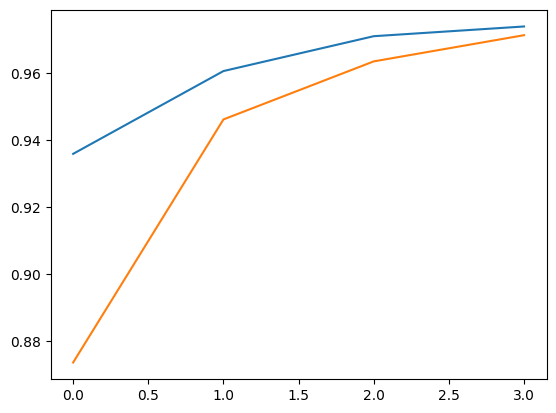

In [8]:
plt.plot(res.history['val_accuracy'])
plt.plot(res.history['accuracy'])